<a href="https://colab.research.google.com/github/Renee0330/bob_study_allFiles/blob/main/03_Tutorial_Week4(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 3: Coding Demo

## In this section, we aim to demonstrate: How to calculate following five centrality calculation methods with only numpy package? And we will compare our results with the results generated by networkx. All the graph examples we used in this manuscript are shown in the lecture sildes.
### 3.1 PageRank Centrality
### 3.2 Hits Centrality
### 3.3 Node Betweenness Centrality


### 3.1 PageRank Centrality

Problem with Katz and Eigenvector Centralities:

- In directed graphs, once a node becomes an authority (high centrality), it passes all its centrality to each of its neighbors

- This is less desirable since not everyone known by a well-known person is well-known, e.g., a fan of a well-known actor

__Solution:__
- We can divide the value of passed centrality by the number of outgoing links, i.e., out-degree of that node

- Each connected neighbor gets a fraction of the source node’s centrality


$$ \boldsymbol{C}_{pr} = \alpha A ^{T} D^{-1} \boldsymbol{C}_{pr} + \beta * \boldsymbol{1} $$

In [1]:
import numpy as np
import networkx as nx
# If you are using https://jupyter.org/try-jupyter/lab/ uncomment following two lines
# import micropip
# await micropip.install("scipy")

# This function is defined to plot the graph.
def plot_graph(graph, diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key,neighbor)
    # Draw the graph.
    nx.draw(g, with_labels=True)  # 在节点上显示节点名字


 # This function outputs an Graph object from networkx package.
def graph_networkx(graph,diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key,neighbor)
    return g

The example is from Page 9 of Week 4 Lecture slides. Please compare the results from the slide and from the code.

___________________________________
adjacency matrix of the graph: 
 [[0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]
Interation 1: the value of the pagerank centrality: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
Interation 2: the value of the pagerank centrality: [0.07142857 0.04761905 0.19047619 0.16666667 0.19047619 0.11904762
 0.21428571]
Interation 3: the value of the pagerank centrality: [0.02380952 0.06349206 0.23809524 0.1468254  0.19047619 0.08730159
 0.25      ]
Interation 4: the value of the pagerank centrality: [0.03174603 0.07936508 0.25793651 0.13095238 0.1547619  0.11111111
 0.23412698]
Interation 5: the value of the pagerank centrality: [0.03968254 0.08597884 0.24470899 0.1521164  0.14153439 0.12566138
 0.21031746]
Interation 6: the value of the pagerank centrality: [0.04298942 0.08156966 0.22354497 0.15762787 0.165

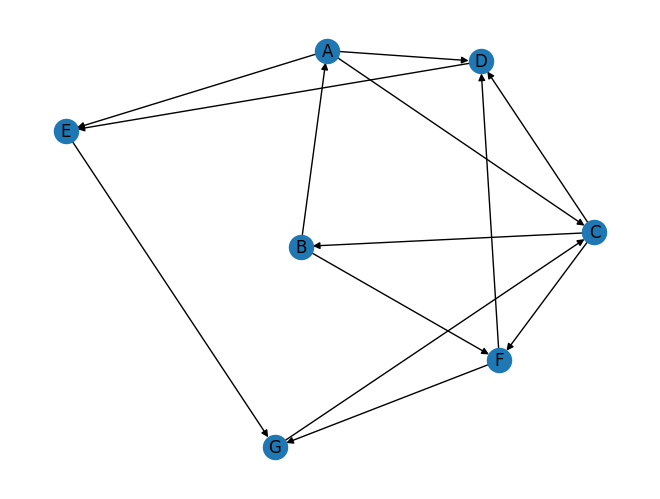

In [2]:
graph = {'A': ['C','D','E'],
         'B': ['A','F'],
         'C': ['B', 'F','D'],
         'D': ['E'],
         'E': ['G'],
         'F': ['D','G'],
         'G': ['C']
        }

def pagerank_centrality(graph, alpha, beta):
    # Construct adjacency matrix
    n = len(graph)
    nodes = sorted(list(graph.keys()))
    # Initialize the adjacency matrix with zeros
    A = np.zeros((n, n))

    # Populate the adjacency matrix
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if nodes[j] in graph[nodes[i]]:
                A[i][j] = 1
    print('adjacency matrix of the graph: \n', A)

    # Construct degree matrix
    D = np.diag(A.sum(axis=1))  # 按行求和

    # Power iteration to calculate PageRank vector
    eps = 1e-6  # 收敛值，精度要求
    count = 0   # 记录迭代次数
    prev_PR = np.zeros(n) # 初始化前一轮的PageRank，全设为0
    PR = np.ones(n) / n   # 初始化PageRandk，均匀分布

    while np.sum(np.abs(prev_PR-PR)) > eps:
        if count < 9:
            count = count+ 1
            print('Interation {}: the value of the pagerank centrality: {}'.format(count,PR))
        prev_PR = PR
        PR = alpha * A.T @ np.linalg.inv(D) @ PR + beta * np.ones(n)
        # np.linalg.inv(D) 对矩阵D取逆
        PR = PR / np.sum(np.abs(PR))  #对PR向量做归一化，使其保持概率分布（元素和为1）

    PR = dict(zip([i for i in range(len(PR))], PR))
    # zip()打包函数，转换成字典把索引和PageRank值打包成键值对。
    return PR


plot_graph(graph, diGraph=True)
print("___________________________________")
print("results from the code: ", pagerank_centrality(graph,1,0))
print("---------------------------------------------------------------------------------------------------")
# network自带的pagerank算法
# nx.pagerank()会调用power iteration算法
print("results from the networkx: ", nx.pagerank(graph_networkx(graph, diGraph=True),alpha=1))

### 3.2 Hits Centrality

Spectral measures
- HITS Centrality: In a directed graph, a node is more important if it has more links
- In-coming links? Out-going links?

Each node has 2 scores:
- Quality as an expert (hub): Total sum of votes (authority scores) of nodes that it points to (out-going links)
- Quality as a content provider (authority): Total sum of votes (hub scores) from nodes that point to it (in-coming links)




The example is from Page 21 of Week 4 Lecture slides. Please compare the results from the slide and from the code.

Node	Authority Score	Hub Score
A	0.0	0.06824002279697558
B	0.0	0.1487834118324772
C	0.0	0.1487834118324772
D	0.04719938048694132	0.0
E	0.05261145332774475	0.08882874713151666
F	0.38874442879917626	0.09901417090912175
G	0.45883328405839297	0.0
H	0.0	0.06824002279697558
I	0.05261145332774475	0.1487834118324772
J	0.0	0.1487834118324772
K	0.0	0.08054338903550161
results from the networkx: 
a:  {'A': -0.0, 'F': 0.3887446414981687, 'B': -0.0, 'G': 0.4588332568533988, 'C': 1.686968374007445e-17, 'E': 0.0526113795232913, 'D': 0.04719934260184994, 'I': 0.052611379523291264, 'H': 1.686968374007445e-17, 'J': -0.0, 'K': 3.37393674801489e-17}
h:  {'A': 0.06824004934994211, 'F': 0.09901412457495647, 'B': 0.14878342088145197, 'G': -0.0, 'C': 0.14878342088145197, 'E': 0.08882872166784155, 'D': -0.0, 'I': 0.14878342088145197, 'H': 0.06824004934994211, 'J': 0.14878342088145197, 'K': 0.08054337153150985}


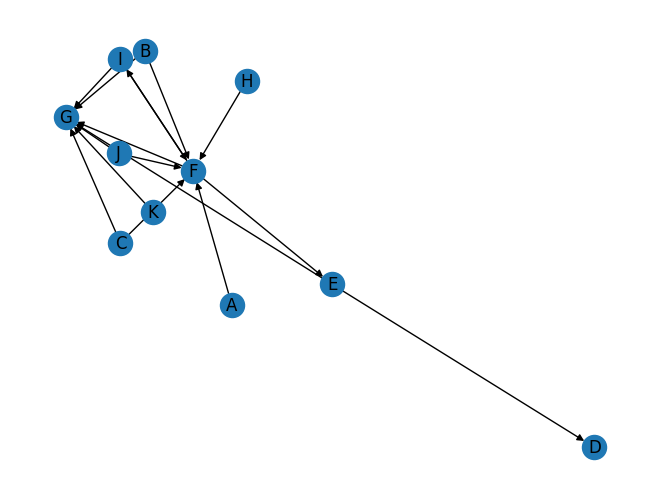

In [4]:
graph = {'A': ['F'],
         'B': ['F', 'G'],
         'C': ['F', 'G'],
         'D': [],
         'E': ['D', 'G'],
         'F': ['E', 'G', 'I'],
         'G': [],
         'H': ['F'],
         'I': ['F', 'G'],
         'J': ['F', 'G'],
         'K': ['G']
         }


def hits_centrality(adj_list):
    nodes = list(adj_list.keys())
    n = len(nodes)
    adj_matrix = np.zeros((n, n))

    # Loop through the adjacency list and fill in the adjacency matrix
    for i, node in enumerate(nodes):
        for neighbor in adj_list[node]:
            j = nodes.index(neighbor)
            adj_matrix[i, j] = 1

    # Set up the HITS algorithm
    n_nodes = len(nodes)
    prev_hub_scores = np.zeros(n_nodes)
    prev_authority_scores = np.zeros(n_nodes)
    hub_scores = np.ones(n_nodes)
    authority_scores = np.ones(n_nodes)

    # Run the HITS algorithm
    eps = 1e-6
    for i in range(10):
        authority_scores = np.dot(adj_matrix.T, hub_scores)
        hub_scores = np.dot(adj_matrix, authority_scores)

    # Normalize the scores
    authority_scores_norm = authority_scores / np.sum(authority_scores)
    hub_scores_norm = hub_scores / np.sum(hub_scores)

    # Print the results
    print("Node\tAuthority Score\tHub Score")
    for i, node in enumerate(nodes):
        print("{}\t{}\t{}".format(node, authority_scores_norm[i], hub_scores_norm[i]))


hits_centrality(graph)
plot_graph(graph, diGraph=True)

h, a = nx.hits(graph_networkx(graph,True),normalized=True)
print("results from the networkx: ")
print("a: ", a)
print("h: ", h)

#### 3.3 Node Betweenness Centrality

results from the code:  {'A': 11.77142857142857, 'B': 2.285714285714286, 'C': 2.285714285714286, 'D': 8.061904761904763, 'E': 2.685714285714286, 'F': 7.133333333333334, 'G': 6.752380952380952, 'H': 6.3, 'I': 8.895238095238096, 'J': 5.785714285714286, 'K': 2.0428571428571427}
results from the networkx:  {'A': 11.771428571428569, 'B': 2.285714285714286, 'C': 2.285714285714286, 'D': 8.061904761904762, 'E': 2.685714285714286, 'F': 7.133333333333334, 'H': 6.3, 'G': 6.752380952380952, 'I': 8.895238095238096, 'J': 5.785714285714286, 'K': 2.0428571428571427}


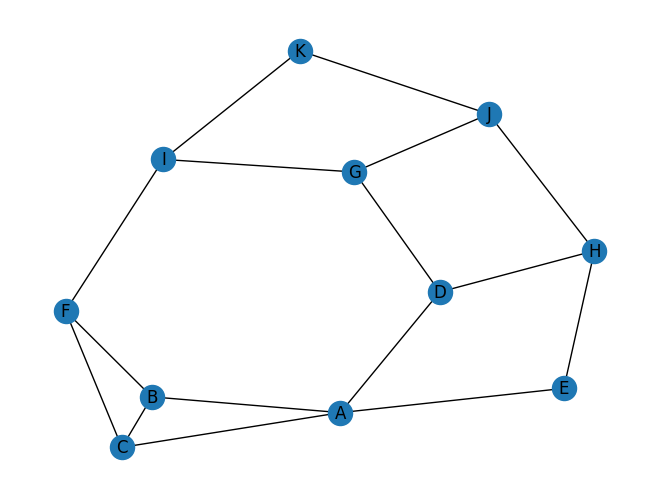

In [11]:
from collections import deque

def betweenness_centrality(adj_list, normalized=True):
    """
    计算图的节点介数中心性（Betweenness Centrality）

    参数：
    adj_list: dict
        图的邻接表表示，例如：
        {
            'A': ['B', 'C'],
            'B': ['A', 'C'],
            'C': ['A', 'B', 'D'],
            'D': ['C']
        }
    normalized: bool
        是否对最终的介数中心性值归一化（无向图除以2）

    返回：
    betweenness: dict
        节点对应的介数中心性值
    """

    # 初始化，存储所有节点的介数中心性，初始值为0
    betweenness = {node: 0.0 for node in adj_list.keys()}

    # 遍历每一个节点 s，作为源点，进行单源最短路径搜索
    for s in adj_list.keys():
        # 栈S，用于回溯时使用（记录节点访问顺序）
        S = []

        # P 记录每个节点的前驱节点（所有最短路径上直接前一个节点）
        P = {v: [] for v in adj_list.keys()}

        # sigma[v]是从源点s到v的最短路径条数
        sigma = {v: 0.0 for v in adj_list.keys()}
        sigma[s] = 1.0  # 自己到自己的路径条数为1

        # D[v] 是从源点s到v的最短路径长度（距离）
        D = {s: 0}  # 自己到自己的距离为0

        # 队列 Q，用于 BFS 搜索最短路径（可以换成 Dijkstra 算法支持加权图）
        Q = deque([s])

        # ---------- BFS 阶段 ----------
        while Q:
            v = Q.popleft()  # 取出当前节点 v
            S.append(v)      # 入栈，回溯时会用到

            # 遍历v的邻接点w
            for w in adj_list[v]:
                # 如果w尚未被访问，则设置它的距离并加入队列
                if w not in D:
                    Q.append(w)
                    D[w] = D[v] + 1  # s到w的距离等于s到v的距离+1

                # 如果找到另一条最短路径到达w
                if D[w] == D[v] + 1:
                    sigma[w] += sigma[v]    # 增加从s到w的路径条数
                    P[w].append(v)          # v是w的前驱节点之一

        # ---------- 回溯阶段，累积依赖度 ----------
        delta = {v: 0.0 for v in adj_list.keys()}  # 初始化依赖度

        # 反向回溯，从栈顶开始（即BFS最后访问的节点）
        while S:
            w = S.pop()

            # 计算依赖度传递系数
            coeff = (1.0 + delta[w]) / sigma[w] if sigma[w] != 0 else 0

            # 将依赖度回传给所有前驱节点 v
            for v in P[w]:
                delta[v] += sigma[v] * coeff

            # 除源节点以外，更新 w 的介数中心性
            if w != s:
                betweenness[w] += delta[w]

    # ---------- 归一化处理 ----------
    if normalized:
        # 无向图：每条最短路径被统计了两次，所以除以2
        for node in betweenness.keys():
            betweenness[node] /= 2.0

    return betweenness

plot_graph(graph)
print("results from the code: ", betweenness_centrality(graph))
print("results from the networkx: ", nx.betweenness_centrality(graph_networkx(graph), normalized= False))